In [37]:
import pandas as pd
data_path = 'heart.csv'
heart_data = pd.read_csv(data_path)

heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [41]:
from scipy.stats import boxcox, shapiro

shapiro_test_statistic, shapiro_test_p_value = shapiro(heart_data['chol'])

shapiro_test_statistic, shapiro_test_p_value

chol_data_positive = heart_data['chol'][heart_data['chol'] > 0]  # Ensure all values are positive
chol_transformed, best_lambda = boxcox(chol_data_positive)

# Perform Shapiro-Wilk test on the transformed data
shapiro_test_statistic_transformed, shapiro_test_p_value_transformed = shapiro(chol_transformed)

shapiro_test_statistic_transformed, shapiro_test_p_value_transformed

(0.9932533502578735, 0.00013344823673833162)

In [13]:
from scipy.stats import ttest_ind
# Cholesterol level and heart disease t-test
group_with_disease = heart_data[heart_data['target'] == 1]['chol']
group_without_disease = heart_data[heart_data['target'] == 0]['chol']

# t-test between the two groups
t_stat, p_value = ttest_ind(group_with_disease, group_without_disease, equal_var=False)

t_stat, p_value

(-3.219133918272536, 0.0013262409956772104)

In [42]:
from scipy.stats import jarque_bera

# Perform Jarque-Bera test on 'thalach'
jarque_bera_test_statistic, jarque_bera_test_p_value = jarque_bera(heart_data['thalach'])

jarque_bera_test_statistic, jarque_bera_test_p_value

(45.341702076637596, 1.4261804997143962e-10)

In [14]:
# Maximum heart rate and heart disease t-test
group_with_disease_thalach = heart_data[heart_data['target'] == 1]['thalach']
group_without_disease_thalach = heart_data[heart_data['target'] == 0]['thalach']

# t-test between the two groups
t_stat_thalach, p_value_thalach = ttest_ind(group_with_disease_thalach, group_without_disease_thalach, equal_var=False)
t_stat_thalach, p_value_thalach

(14.861535005195252, 3.418866592963028e-45)

In [15]:
# Resting blood pressure and heart disease F-test
group_with_disease_trestbps = heart_data[heart_data['target'] == 1]['trestbps']
group_without_disease_trestbps = heart_data[heart_data['target'] == 0]['trestbps']

# Calculate variances of the two groups
var_with_disease = group_with_disease_trestbps.var(ddof=1) 
var_without_disease = group_without_disease_trestbps.var(ddof=1)

# Sample sizes
n_with_disease = len(group_with_disease_trestbps)
n_without_disease = len(group_without_disease_trestbps)

# Calculate the F-statistic 
F_statistic = var_with_disease / var_without_disease
F_statistic

0.7522638828749417

In [20]:
from statsmodels.stats.proportion import proportions_ztest
# proportion test

count_with_disease = heart_data[heart_data['target'] == 1]['exang'].sum()
count_without_disease = heart_data[heart_data['target'] == 0]['exang'].sum()

nobs_with_disease = heart_data[heart_data['target'] == 1].shape[0]
nobs_without_disease = heart_data[heart_data['target'] == 0].shape[0]

# Perform the difference of two proportions test
stat, pval = proportions_ztest([count_with_disease, count_without_disease], [nobs_with_disease, nobs_without_disease])

stat, pval

(-14.023756127750787, 1.1155084593065364e-44)

In [43]:
from scipy.stats import mannwhitneyu

# Divide the dataset into two groups based on sex
chol_male = heart_data[heart_data['sex'] == 1]['chol']
chol_female = heart_data[heart_data['sex'] == 0]['chol']

# Wilcoxon Mann-Whitney test
u_statistic, p_value = mannwhitneyu(chol_male, chol_female, alternative='two-sided')

u_statistic, p_value

(89877.0, 9.790630678458942e-07)

In [28]:
from scipy.stats import norm, sem
# Point Estimation
mean_trestbps = heart_data['trestbps'].mean()
mean_chol = heart_data['chol'].mean()

# Standard errors for the mean estimates
se_trestbps = sem(heart_data['trestbps'])
se_chol = sem(heart_data['chol'])

# 95% confidence interval 
ci_trestbps = norm.interval(0.95, loc=mean_trestbps, scale=se_trestbps)
ci_chol = norm.interval(0.95, loc=mean_chol, scale=se_chol)
mean_trestbps, ci_trestbps, mean_chol, ci_chol


(131.61170731707318,
 (130.5393515374625, 132.68406309668387),
 246.0,
 (242.8415586477306, 249.1584413522694))

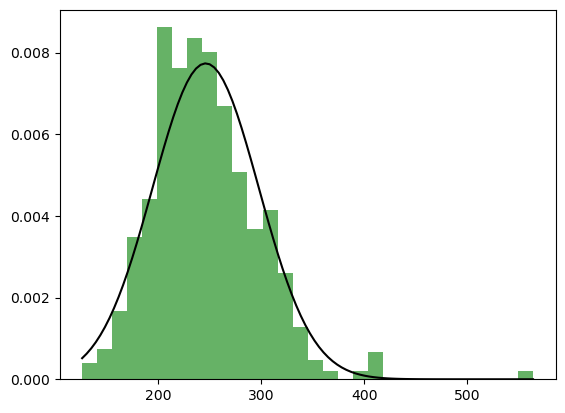

(246.0, 51.56733698672483)

In [36]:
# Maximum likelihood estimation
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
chol_data = heart_data['chol']

mu_estimate, std_estimate = norm.fit(chol_data)
points = np.linspace(chol_data.min(), chol_data.max(), 100)

pdf = norm.pdf(points, mu_estimate, std_estimate)

plt.hist(chol_data, density=True, alpha=0.6, color='g', bins=30)
plt.plot(points, pdf, 'k')
plt.show()
mu_estimate, std_estimate

In [45]:
missing_data = heart_data.isnull().sum()

missing_data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64